In [ ]:
import time

start_time = time.time()

In [ ]:
import tensorflow as tf

In [ ]:
#!pip install --upgrade kagglehub
import kagglehub

path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/waste-classification-data


In [ ]:
import os
import kagglehub

base_dir = os.path.join(path, 'DATASET')

if os.path.exists(base_dir):
    print("Daftar file/folder dalam dataset:")
    print(os.listdir(base_dir))
else:
    print(f"Direktori {base_dir} tidak ditemukan.")

Daftar file/folder dalam dataset:
['TEST', 'TRAIN']


In [ ]:
train_dir = os.path.join(base_dir, "TRAIN")
test_dir = os.path.join(base_dir, "TEST")
print(os.listdir(train_dir))
print(os.listdir(test_dir))

['R', 'O']
['R', 'O']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

train_datagen = ImageDataGenerator(
                    preprocessing_function=preprocess_input,
                    rotation_range=35,
                    zoom_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    preprocessing_function=preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

vgg_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

for layer in vgg_model.layers:
    layer.trainable = True

x = tf.keras.layers.Flatten()(vgg_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=vgg_model.input, outputs=outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,02

 Total params: 41,456,449 (158.14 MB)

 Trainable params: 41,456,449 (158.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.models import load_model
import numpy as np
import os

class SaveBestModelByAccDifference(Callback):
    def __init__(self, filepath, monitor='val_accuracy', max_diff=0.05, verbose=1):
        super(SaveBestModelByAccDifference, self).__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.max_diff = max_diff
        self.verbose = verbose
        self.best_val_acc = 0.0
        self.best_epoch = None

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_acc = logs.get('val_accuracy', 0)
        train_acc = logs.get('accuracy', 0)

        if val_acc is not None and train_acc is not None:
            acc_diff = abs(val_acc - train_acc)

            if val_acc > self.best_val_acc and acc_diff <= self.max_diff:
                self.best_val_acc = val_acc
                self.best_epoch = epoch + 1
                try:
                    self.model.save(self.filepath, overwrite=True)
                    if self.verbose > 0:
                        print(f"\nEpoch {epoch + 1}: Validation accuracy improved to {val_acc:.4f} with acceptable difference ({acc_diff:.4f}). Model saved.")
                except Exception as e:
                    print(f"Error saving model at epoch {epoch + 1}: {e}")


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

checkpoint_path = "best_model_with_acc_diff.keras"

custom_checkpoint = SaveBestModelByAccDifference(
    filepath=checkpoint_path,
    monitor="val_accuracy",
    max_diff=0.05,
    verbose=1
)

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

batch_size = 32
steps_per_epoch = len(train_generator)
validation_steps = len(test_generator)

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=validation_steps,
    verbose=1,
    callbacks=[early_stopping, custom_checkpoint]
)

if os.path.exists(checkpoint_path):
    best_model = load_model(checkpoint_path)
    print("Loaded model path:", checkpoint_path)

    best_epoch = custom_checkpoint.best_epoch
    val_accuracy = custom_checkpoint.best_val_acc
    print(f"Best epoch: {best_epoch}, Best validation accuracy: {val_accuracy:.4f}")

    if best_epoch > 0:
        train_accuracy = history.history['accuracy'][best_epoch - 1]
        print(f"Train accuracy at best epoch: {train_accuracy:.4f}")
    else:
        print("No valid best epoch was found.")

else:
    print("No model was saved with the specified conditions.")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 565s 739ms/step - accuracy: 0.7747 - loss: 0.5016 - val_accuracy: 0.8715 - val_loss: 0.3446
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.8315 - loss: 0.3912
Epoch 2: Validation accuracy improved to 0.8826 with acceptable difference (0.0432). Model saved.
706/706 ━━━━━━━━━━━━━━━━━━━━ 435s 616ms/step - accuracy: 0.8315 - loss: 0.3911 - val_accuracy: 0.8826 - val_loss: 0.2939
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - accuracy: 0.8575 - loss: 0.3496
Epoch 3: Validation accuracy improved to 0.8862 with acceptable difference (0.0323). Model saved.
706/706 ━━━━━━━━━━━━━━━━━━━━ 439s 611ms/step - accuracy: 0.8575 - loss: 0.3496 - val_accuracy: 0.8862 - val_loss: 0.2739
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.8624 - loss: 0.3341
Epoch 4: Validation accuracy improved to 0.8926 with acceptable difference (0.0273). Model saved.
706/706 ━━━━━━━━━━━━━━━━━━━━ 438s 606ms/step - accuracy: 0.8624 - lo

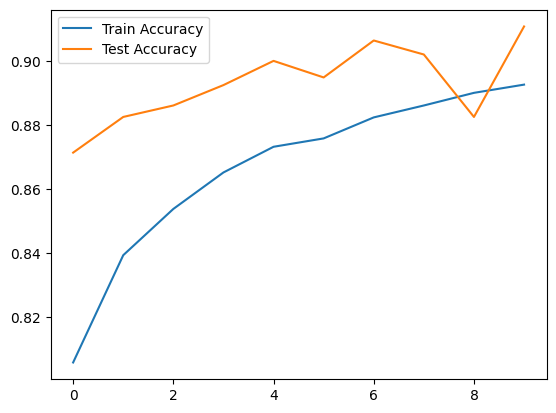

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # Plot distribusi probabilitas prediksi
# plt.hist(predictions, bins=50, edgecolor='black')
# plt.xlabel("Predicted Probability")
# plt.ylabel("Frequency")
# plt.title("Distribution of Model Predictions")
# plt.show()


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn

    img = image.load_img(path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = best_model.predict(x)

    threshold = 0.5

    prob_recyclable = classes[0][0]

    predicted_class_index = int(prob_recyclable > threshold)

    class_names = ['Recyclable', 'Organic']

    print(f"File: {fn}")
    print(f"Predicted class: {class_names[predicted_class_index]} (Confidence: {prob_recyclable:.2f})")



In [ ]:
final_train_accuracy = (np.mean(train_accuracy))*100
final_val_accuracy = (np.mean(val_accuracy))*100
end_time = time.time()
elapsed_time = (end_time - start_time)/60

In [ ]:
print('Train ACCURACY =:', final_train_accuracy, '%')
print('VAL ACCURACY =:', final_val_accuracy, '%')
print("Runtime:", elapsed_time, "minutes")

Train ACCURACY =: 89.27052021026611 %
VAL ACCURACY =: 91.08635187149048 %
Runtime: 76.72943502267202 minutes


In [ ]:
# Convert model best_model.keras to format TensorFlow Lite (.tflite)
converter = tf.lite.TFLiteConverter.from_keras_model(best_model)
tflite_model = converter.convert()

# Save model with format .tflite to file
tflite_model_path = "best_model.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"Model has been successfully converted to TFLite and saved at: {tflite_model_path}")

Saved artifact at '/tmp/tmp0_t36hdw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139841190881680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139841190884176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139841190884944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139841050913360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139841050914320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139841050916240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139841050913168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139841050916432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139841050915472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139841050915280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139841050914896

In [ ]:
# Download file .tflite
from google.colab import files
files.download(tflite_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>